<a href="https://colab.research.google.com/github/gomesjonathan99/LlamaIndex-Tests/blob/main/LamaIndex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

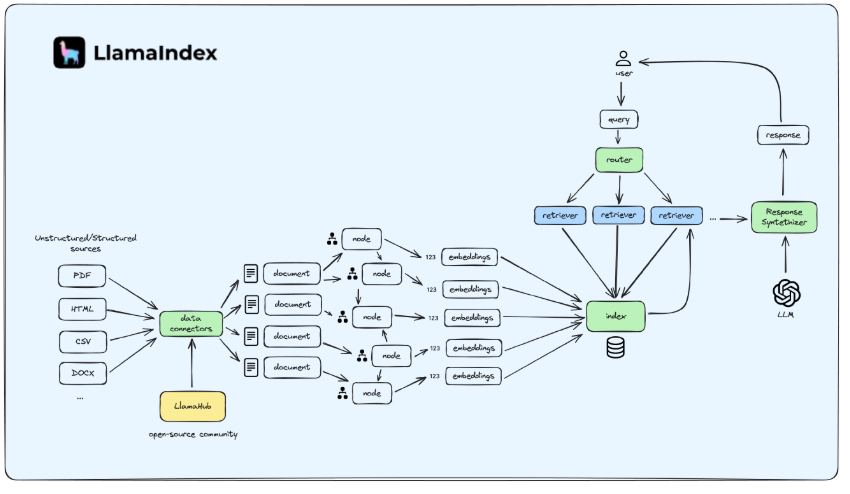

In [1]:
%pip install -Uq llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [2]:
import getpass
import os

os.environ['OPENAI_API_KEY'] = getpass.getpass("OpenAI API Key: ")


OpenAI API Key: ··········


In [16]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from time import time
# Start time ⏳
s_time = time()

documents = SimpleDirectoryReader("data").load_data()
index = VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine()
response = query_engine.query("What is the fourth article?")

# End time ⏳
e_time = time()
print(f"Execution time: {e_time - s_time:.2f} seconds")
print(response)

Execution time: 26.62 seconds
The fourth article is about Bihar and it specifies the number of seats allocated for Bihar in the Council of States.


### This is much faster than the above one

In [17]:
import os
from time import time
from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    StorageContext,
    load_index_from_storage,
)

# Start time ⏳
s_time = time()

# Check if storage already exists
PERSIST_DIR = "./storage"

if not os.path.exists(PERSIST_DIR):
    # Load the documents and create the index
    documents = SimpleDirectoryReader("data").load_data()
    index = VectorStoreIndex.from_documents(documents)
    # Store it for later
    index.storage_context.persist(persist_dir=PERSIST_DIR)
else:
    # Load the existing index
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(storage_context)

# Query the index
query_engine = index.as_query_engine()
response = query_engine.query("What is the fourth article?")

# End time ⏳
e_time = time()

# Print the response and execution time
print(f"Execution time: {e_time - s_time:.2f} seconds")
print(response)

Execution time: 4.40 seconds
The fourth article is about Bihar and it specifies the number of seats allocated for Bihar in the Council of States.
